# Law of large numbers

https://en.wikipedia.org/wiki/Law_of_large_numbers

[*********************100%***********************]  1 of 1 completed


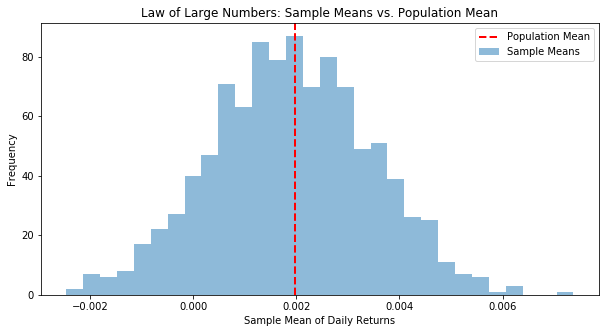

In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to apply the Law of Large Numbers to stock data
def law_of_large_numbers(symbol, start, end, num_samples):
    # Download the stock data
    dataset = yf.download(symbol, start, end)

    # Calculate daily returns
    dataset['Daily_Return'] = dataset['Adj Close'].pct_change()

    # Calculate the mean of the daily returns
    mean_returns = dataset['Daily_Return'].mean()

    # Create an array to store sample means
    sample_means = []

    # Perform multiple samples and calculate sample means
    for _ in range(num_samples):
        sample = dataset['Daily_Return'].sample(frac=0.5, replace=True)
        sample_mean = sample.mean()
        sample_means.append(sample_mean)

    # Plot the sample means
    plt.figure(figsize=(10, 5))
    plt.hist(sample_means, bins=30, alpha=0.5, label='Sample Means')
    plt.axvline(mean_returns, color='r', linestyle='dashed', linewidth=2, label='Population Mean')
    plt.xlabel('Sample Mean of Daily Returns')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Law of Large Numbers: Sample Means vs. Population Mean')
    plt.show()

# Input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'
num_samples = 1000  # Number of samples to draw

# Apply the Law of Large Numbers to stock data
law_of_large_numbers(symbol, start, end, num_samples)